In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

**QUESTÃO 1**

In [4]:
def spa(lamb=1, mu1=3, mu2=2, c=1, N0=0, Tmax=10**5):

    intervalo = 0 # incrementos de tempo entre transições
    T = [0] # lista de tempos dos eventos
    N = [N0] # lista de estados
    qtd_pessoas = 0
    vetor_qtd = [0]
    fila_espera = []

    while T[-1] < Tmax:
        # (0,0)
        if(N[-1] == 0):
            intervalo = np.random.exponential(1/lamb)
            N.append(1)
            qtd_pessoas += 1
        # (1, 0)    
        elif(N[-1] == 1):
            intervalo = np.random.exponential(1/mu1)
            N.append(2)
        # (0, 1)
        elif(N[-1] == 2):
            intervalo = np.random.exponential(1/(mu2+lamb))
            if(np.random.random() < (lamb/(mu2+lamb))) :
                N.append(3)
                qtd_pessoas += 1
            else:
                N.append(0)
                qtd_pessoas -= 1
        # (1,1)
        elif(N[-1] == 3):
            intervalo = np.random.exponential(1/(mu2+mu1))
            if(np.random.random() < (mu1/(mu2+mu1))) :
                N.append(4)
            else:
                N.append(1)
                qtd_pessoas -= 1
        # (w,1)
        elif(N[-1] == 4):
            intervalo = np.random.exponential(1/mu2)
            N.append(2)
            qtd_pessoas -= 1

        vetor_qtd.append(qtd_pessoas)
        T.append(T[-1] + intervalo)

    return T, vetor_qtd

In [5]:
# (1) (A)

def n_medio_pessoas(lamb, mu1=1, mu2=1, c=1, N0=0, Tmax=10**5):
    ls = [i for i in range(1, lamb+1)]
    fls = []

    for l in ls:
        fl = spa(l, mu1, mu2, c, N0, Tmax)[1]
        fls.append(sum(fl) / len(fl))

    return ls, fls

xs, ys = n_medio_pessoas(15)

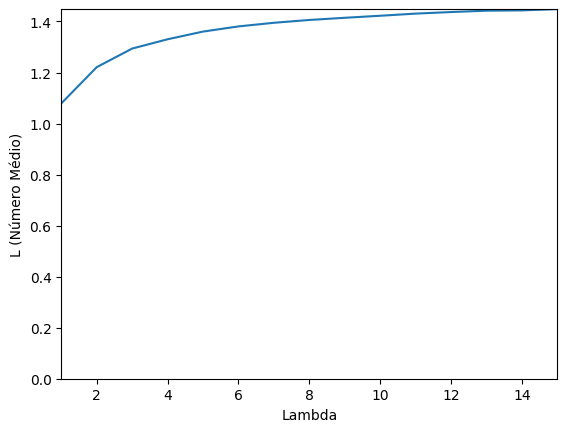

In [6]:
fig, ax = plt.subplots()
ax.plot(xs, ys)
plt.ylabel("L (Número Médio)")
plt.xlabel("Lambda")
ax.set(xlim=(min(xs), max(xs)), ylim=(0, max(ys)))
plt.show()

In [35]:
# (1) (B)

# ****Fiz junto com o Pellegrini no Lab, por isso só copiei!!!****

# função para simulação do ex. do Spa COM FILA DE ESPERA
def simula_spa_espera(lamb, mu1, mu2, c=1, n0=0, e=5, Tmax=10**5):

    intervalo = 0             # incrementos de tempo entre transições
    T = [0]                   # lista de tempos dos eventos
    N = [n0]                  # lista de estados 
    qtd_pessoas = 0           # quantidade de pessoas no sistema
    vetor_pessoas = []        # Vetor de pessoas no sistema
    qtd_pessoas_espera = 0    # Quantidade de pessoas na fila de espera
    qtd_pessoas_atendidas = 0 # Quantidade de pessoas atendidas (mu2)

    while T[-1] < Tmax:
        # Estados (0, _) são independentes da fila de espera
        # uma vez que chegadas vão direto para o sistema.
        # --------------------------------------------------
        #(0, 0)
        if(N[-1] == 0):
            intervalo = np.random.exponential(1/lamb)
            qtd_pessoas += 1
            N.append(1)
            
        #(1, 0) - Se chega vai pra fila de espera
        elif(N[-1] == 1):
            intervalo = np.random.exponential(1/(mu1+lamb))
            # Se saída:
            if np.random.random() < mu1/(mu1+lamb):
                # Se fila_espera vazia -> 0,1
                if qtd_pessoas_espera == 0:
                    N.append(2)
                # Senão -> 1,1
                else:
                    qtd_pessoas_espera -= 1
                    qtd_pessoas += 1
                    N.append(3)
            # Se chegada:
            else:
                if qtd_pessoas_espera < e: qtd_pessoas_espera += 1
            
        #(0, 1)
        elif(N[-1] == 2):
            intervalo = np.random.exponential(1/(mu2+lamb))
            # Se chegada:
            if(np.random.random() < (lamb/(mu2+lamb))):
                N.append(3)
                qtd_pessoas += 1
            # Se saída:
            else:
                N.append(0)
                qtd_pessoas -= 1
                qtd_pessoas_atendidas += 1
                
        #(1, 1) - Se chega vai pra fila de espera
        elif(N[-1] == 3):
            intervalo = np.random.exponential(1/(mu2+mu1+lamb))
            # Se chegada:
            if np.random.random() < lamb/(mu1+lamb):
                if qtd_pessoas_espera < e: qtd_pessoas_espera += 1
            # Senão, se saída mu1:
            elif(np.random.random() < (mu1/(mu2+mu1))):
                N.append(4)
            # Senão (se saída mu2):
            else:
                N.append(1)
                qtd_pessoas -= 1
                qtd_pessoas_atendidas += 1
                
        #(w, 1) - Se chega vai pra fila de espera
        elif(N[-1] == 4):
            intervalo = np.random.exponential(1/(mu2+lamb))
            # Se saída:
            if np.random.random() < mu2/(mu2+lamb):
                N.append(2)
                qtd_pessoas -= 1
                qtd_pessoas_atendidas += 1
            # Se entrada:
            else:
                if qtd_pessoas_espera < e: qtd_pessoas_espera += 1

        T.append(T[-1] + intervalo)
        vetor_pessoas.append(qtd_pessoas+qtd_pessoas_espera)
        
    return vetor_pessoas, T[-1], qtd_pessoas_atendidas

In [83]:
EXECUCOES = 10**5
lista_limite_fila = [l for l in range(2, 31, 4)]
lista_L_medio = []
lista_W_medio = []

for limite in lista_limite_fila:
    pessoas, tempo, qtd_atendida = simula_spa_espera(
                                    lamb = 0.8, mu1 = 3, 
                                    mu2  = 2  , c   = 1, 
                                    n0   = 0  , e   = limite,
                                    Tmax = EXECUCOES)
    
    media_L = sum(pessoas)/ len(pessoas)
    media_W = (tempo*media_L) / qtd_atendida
    
    lista_L_medio.append(media_L)
    lista_W_medio.append(media_W)

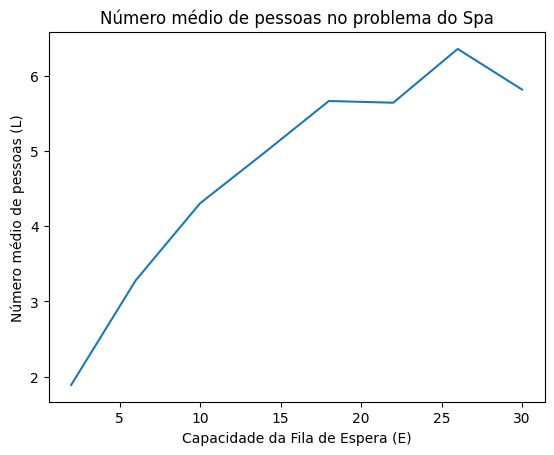

In [84]:
fig,ax = plt.subplots()
ax.plot(lista_limite_fila, lista_L_medio)
#ax.set_xticks(experimentos)
#ax.set_yticks(vetor_passos)
#plt.xticks(rotation = 45)
plt.xlabel(f'Capacidade da Fila de Espera (E)')
plt.ylabel('Número médio de pessoas (L)')
plt.title('Número médio de pessoas no problema do Spa')
plt.show()

**QUESTÃO 2**

In [4]:
def banco(lamb=1, mu=1.2, P=0, Tmax=10**2):
    
    # na fila (tempos de entrada)
    normais = []
    prefs = []
    
    # tempo de espera (tipo, entrada, saida)
    diffs = []
    
    T = [0] # lista de tempos dos eventos
    
    while T[-1] < Tmax:
        # fila vazia
        if len(normais) + len(prefs) == 0:
            intervalo = np.random.exponential(1/lamb)
            if np.random.random() < P:
                prefs.append(T[-1] + intervalo)
            else:
                normais.append(T[-1] + intervalo)
                
        # fila não-vazia
        else:
            intervalo = np.random.exponential(1/(lamb+mu))
            # chegada de mais um
            if(np.random.random() < (lamb/(lamb+mu))):
                if np.random.random() < P:
                    prefs.append(T[-1] + intervalo)
                else:
                    normais.append(T[-1] + intervalo)
            # saida de mais um
            else:
                if len(prefs) != 0:
                    entrada_pref = prefs.pop(0)
                    diffs.append(('p', entrada_pref, T[-1] + intervalo))
                else:
                    entrada_normal = normais.pop(0)
                    diffs.append(('n', entrada_normal, T[-1] + intervalo))
                    
        T.append(T[-1] + intervalo)
        
    return T, diffs

def W_tempo_espera(lamb=1, mu=1.2, P=0, Tmax=10**2):
    _, diffs = banco(lamb=1, mu=1.2, P=0, Tmax=Tmax)
    
    return mean(list(map(lambda vs: abs(vs[2]-vs[1]), diffs)))

In [5]:
# (2) (A)

def valores_plot(ps, lamb=1, mu=1.2, Tmax=10**2, N=10**3):
    vs = ([],[])
    
    for p in ps:
        media = mean([W_tempo_espera(lamb, mu, p, Tmax) for i in range(N)])
        vs[0].append(p)
        vs[1].append(media)
        
    return vs[0], vs[1]


ps=np.around(np.linspace(0, 1, 11).astype(float), 2).tolist()

xs, ys = valores_plot(ps=ps)

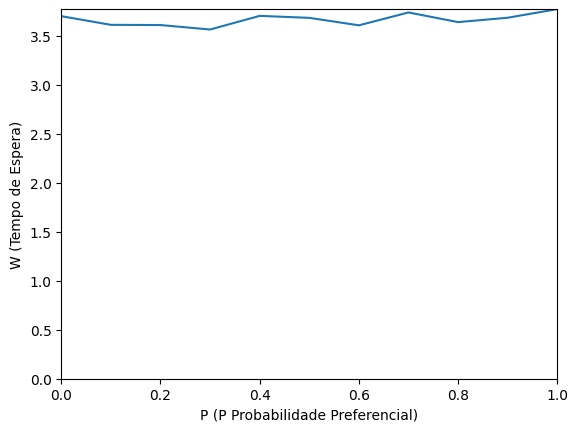

In [6]:
fig, ax = plt.subplots()
ax.plot(xs, ys)
plt.xlabel("P (P Probabilidade Preferencial)")
plt.ylabel("W (Tempo de Espera)")
ax.set(xlim=(min(xs), max(xs)), ylim=(0, max(ys)))
plt.show()

Ter preferencial não muda o tempo W (provavelmente pessoas não-preferenciais terão um tempo de espera maior).

In [7]:
# (2) (B)

def valores_boxplot(p, lamb=1, mu=1.2, Tmax=10**3):
    _, diffs = banco(lamb=1, mu=1.2, P=0, Tmax=Tmax)
    
    
    return list(map(lambda v: abs(v[2] - v[1]), diffs))

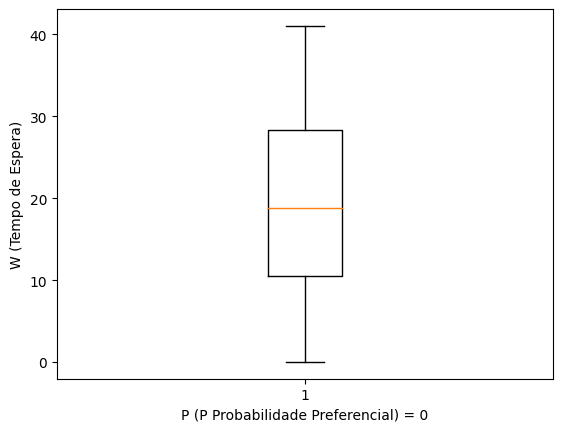

In [38]:
p = 0
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

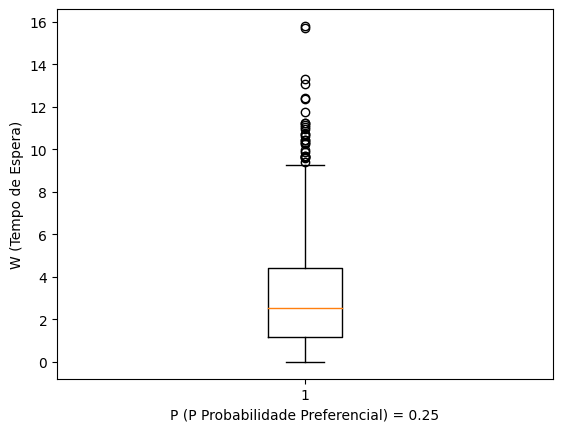

In [32]:
p = 0.25
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

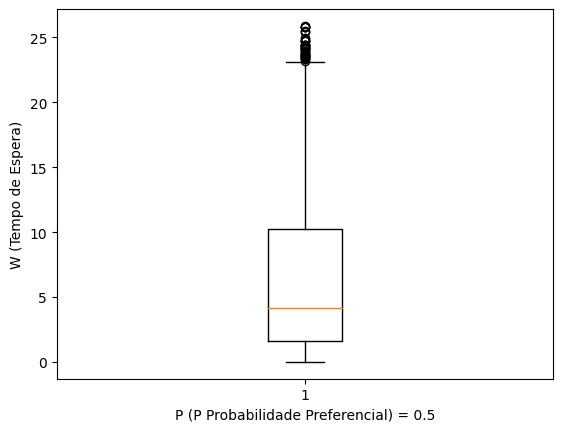

In [61]:
p = 0.5
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

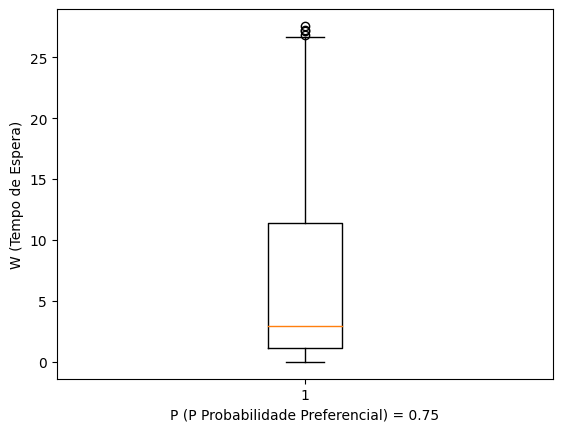

In [22]:
p = 0.75
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

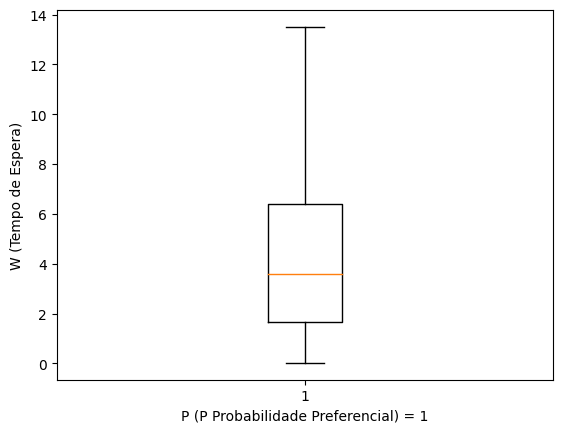

In [20]:
p = 1
fig, ax = plt.subplots()
ax.boxplot(valores_boxplot(p=p))
plt.xlabel(f"P (P Probabilidade Preferencial) = {p}")
plt.ylabel("W (Tempo de Espera)")
plt.show()

Interessante pensar que a média de espera não muda _drasticamente_ em relação à probabilidade do preferencial P, porém a distribuição da espera com certeza muda. O interessante é ver que quando P=0.5, por exemplo, existem outliers, que não existiam no P=0. Nesse exemplo, é óbvio que se, de cada 2 pessoas, em média, 1 é preferencial, essas que não são preferenciais serão afetadas (pois os preferenciais sempre passarão na frente delas), aumentando o intervalo de espera (e, portanto, tornando-os outliers). Veja que, em geral, aproximando-se de P=0.5 (coloquei só P=0.25 e P=0.75, e ainda com poucos valores de Tmax, então não estabilizou tanto a distribuição), os outliers só crescem (a proporção entre preferenciais e não-preferenciais torna-se próxima à 1).

**QUESTÃO 3**

In [50]:
# (3)

def duas_mm1(lamb=1, mu=1.2, Tmax=10**2):
    
    # na fila (tempos de entrada)
    fila1 = []
    fila2 = []
    
    # tempo de espera (fila, tempo_entrada, tempo_saida)
    diffs = []
    
    #tempo ocioso (fila, tempo_ocioso)
    ocioso = []
    
    T = [0] # lista de tempos dos eventos
    
    while T[-1] < Tmax:
        
        # --------------------------------------------------------------------------
        
        # fila1 e fila2 vazias
        if len(fila1) == 0 and len(fila2) == 0:
            intervalo = np.random.exponential(1/lamb)
            
            # pessoa que chega escolhe 50/50 a fila que vai entrar
            if(np.random.random() < 0.5):
                fila1.append(T[-1] + intervalo)
            else:
                fila2.append(T[-1] + intervalo)
            
            # os dois atendentes ficam ociosos esperando
            ocioso.extend([('f1', T[-1], T[-1] + intervalo), ('f2', T[-1], T[-1] + intervalo)])
        
        # --------------------------------------------------------------------------
        
        # fila1 vazia e fila2 com pessoa esperando:
        elif len(fila1) == 0 and len(fila2) != 0:
            intervalo = np.random.exponential(1/(lamb+mu))
            
            # chegada de mais um
            if(np.random.random() < (lamb/(lamb+mu))):
                # pessoa que chega escolhe 50/50 a fila que vai entrar
                if(np.random.random() < 0.5):
                    fila1.append(T[-1] + intervalo)
                else:
                    fila2.append(T[-1] + intervalo)
                
                ocioso.extend([('f1', T[-1], T[-1] + intervalo), ('f2', T[-1], T[-1] + intervalo)])
            
            # fila2 atende uma pessoa:
            else:
                entrada = fila2.pop(0)
                diffs.append(('f2', entrada, T[-1] + intervalo))
                
                # enquanto fila2 atende a pessoa, fila1 fica ociosa esperando
                ocioso.append(('f1', T[-1], T[-1] + intervalo))
        
        # --------------------------------------------------------------------------
        
        # fila2 vazia e fila1 com pessoa esperando:
        elif len(fila2) == 0 and len(fila1) != 0:
            intervalo = np.random.exponential(1/(lamb+mu))
            
            # chegada de mais um
            if(np.random.random() < (lamb/(lamb+mu))):
                # pessoa que chega escolhe 50/50 a fila que vai entrar
                if(np.random.random() < 0.5):
                    fila1.append(T[-1] + intervalo)
                else:
                    fila2.append(T[-1] + intervalo)
                
                ocioso.extend([('f1', T[-1], T[-1] + intervalo), ('f2', T[-1], T[-1] + intervalo)])
            
            # fila1 atende uma pessoa:
            else:
                entrada = fila1.pop(0)
                diffs.append(('f1', entrada, T[-1] + intervalo))
                
                # enquanto fila1 atende a pessoa, fila2 fica ociosa esperando
                ocioso.append(('f2', T[-1], T[-1] + intervalo))
        
        # --------------------------------------------------------------------------
        
        # fila1 e fila2 com pessoa esperando:
        else:
            intervalo = np.random.exponential(1/(lamb+mu))
                
            # chegada de mais um
            if(np.random.random() < (lamb/(lamb+mu))):
                # pessoa que chega escolhe 50/50 a fila que vai entrar
                if(np.random.random() < 0.5):
                    fila1.append(T[-1] + intervalo)
                else:
                    fila2.append(T[-1] + intervalo)
                
                ocioso.extend([('f1', T[-1], T[-1] + intervalo), ('f2', T[-1], T[-1] + intervalo)])
            
            # alguma fila atende uma pessoa
            else:
                
                # cada fila tem 50% de ter sido a fila a atender a pessoa, pois
                # essa probabilidade é P = mu1 / (mu1 + mu2) = mu / 2mu = 1/2
                
                # fila1 foi a fila a atender alguem
                if(np.random.random() < 0.5):
                    entrada = fila1.pop(0)
                    diffs.append(('f1', entrada, T[-1] + intervalo))
                    ocioso.append(('f2', T[-1], T[-1] + intervalo))
                
                # fila2 foi a fila a atender alguem
                else:
                    entrada = fila2.pop(0)
                    diffs.append(('f2', entrada, T[-1] + intervalo))
                    ocioso.append(('f1', T[-1], T[-1] + intervalo))
                   
        T.append(T[-1] + intervalo)
        
    return T, diffs, ocioso

In [60]:
res1 = duas_mm1(Tmax=10**5)
res1

([0,
  1.8515395547811107,
  2.2182269129450716,
  3.1256156055041804,
  4.889602481012042,
  5.843206580540754,
  6.404640845642528,
  6.582886955305305,
  6.797897605861161,
  6.870242359019397,
  6.959737593399396,
  7.584866528262324,
  7.971318442343502,
  8.183575528594556,
  8.397971202866366,
  8.6162797571074,
  9.328833004182528,
  9.364505289306308,
  9.46708910810927,
  10.151029694102153,
  10.20134839215855,
  11.857956104391445,
  12.927612087455044,
  13.139170029502843,
  13.334428180244092,
  13.476731713541074,
  13.733529324080795,
  13.964120395530161,
  14.277156451323657,
  14.38449346068866,
  14.886603751083625,
  15.553866446761427,
  15.983195899749598,
  16.645532027064135,
  17.543890903113013,
  17.60406397164007,
  18.03849588923281,
  18.548455787669585,
  18.67604537974096,
  18.782937168055916,
  19.988485869792406,
  20.9557669883552,
  21.27378989550513,
  21.560320325074947,
  23.237141659577812,
  23.382781962913068,
  23.451888078762266,
  23.8798

In [71]:
_, _, ocioso = res1

In [75]:
# Quantidade em segundos que o atendente 1 fica ocioso

ocioso_at1 = list(filter(lambda e: e[0] == 'f1', ocioso))
ocioso_at1 = list(map(lambda e: abs(e[2] - e[1]), ocioso_at1))
ocioso_at1 = sum(ocioso_at1)
ocioso_at1

77391.17034813964

In [76]:
# Quantidade em segundos que o atendente 2 fica ocioso

ocioso_at2 = list(filter(lambda e: e[0] == 'f2', ocioso))
ocioso_at2 = list(map(lambda e: abs(e[2] - e[1]), ocioso_at2))
ocioso_at2 = sum(ocioso_at2)
ocioso_at2

77187.0718458359

In [67]:
# (3)

def mm2(lamb=2, mu=1.2, Tmax=10**2):
    
    # na fila (tempos de entrada)
    fila = []
    
    # situacao dos atendentes (se estao ocupados)
    ocupado1 = False
    ocupado2 = False
    
    # tempo de espera (fila, tempo_entrada, tempo_saida)
    diffs = []
    
    #tempo ocioso (fila, tempo_ocioso)
    ocioso = []
    
    T = [0] # lista de tempos dos eventos
    
    while T[-1] < Tmax:
        
        # --------------------------------------------------------------------------
        
        # fila vazia
        if len(fila) == 0:
            intervalo = np.random.exponential(1/lamb)
            
            # os dois atendentes ficam ociosos esperando
            ocioso.extend([('a1', T[-1], T[-1] + intervalo), ('a2', T[-1], T[-1] + intervalo)])
        
        # --------------------------------------------------------------------------
        
        # fila não-vazia:
        else:
            intervalo = np.random.exponential(1/(lamb+mu))
            
            # chegada de mais um
            if(np.random.random() < (lamb/(lamb+mu))):
                fila.append(T[-1] + intervalo)
                
                # ambos nao atendem ninguem, ficam ociosos
                ocioso.extend([('a1', T[-1], T[-1] + intervalo), ('a2', T[-1], T[-1] + intervalo)])
            
            # algum dos atendentes atendem alguem com igual probabilidade
            else:
                
                # atendente1 atendeu
                if(np.random.random() < 0.5):
                    entrada = fila.pop(0)
                    diffs.append(('a1', entrada, T[-1] + intervalo))
                    ocioso.append(('a2', T[-1], T[-1] + intervalo))
                
                # atendente2 atendeu
                else:
                    entrada = fila.pop(0)
                    diffs.append(('a2', entrada, T[-1] + intervalo))
                    ocioso.append(('a1', T[-1], T[-1] + intervalo))
           
        T.append(T[-1] + intervalo)
        
    return T, diffs, ocioso

In [68]:
res2 = mm2(Tmax=10**5)
res2

([0,
  0.3842609681547326,
  0.980293308248249,
  1.3794678964053761,
  2.060841142370436,
  2.758921324853727,
  2.892109519067166,
  3.1133106605132896,
  5.471890325027576,
  7.057557055503853,
  7.903982841765465,
  8.091079689173386,
  8.277170914575377,
  8.424019356043967,
  8.658455397029545,
  8.889447485908095,
  8.919117755846084,
  9.766936082338653,
  10.306013240897567,
  10.34215793793742,
  10.510034325662396,
  10.67237016911588,
  10.774529298725533,
  11.518077009576828,
  11.569341827371488,
  11.645037823730222,
  11.693296190884068,
  12.513560485865787,
  13.110316731608632,
  13.13030959077836,
  13.283853520709933,
  13.781778075517943,
  13.785030401836945,
  14.183008011698401,
  14.535536828318225,
  14.64789198656687,
  14.673498984188303,
  15.062987646569526,
  15.178723876601458,
  15.607404112911247,
  15.638738135496284,
  16.893894902602835,
  17.643745428792,
  19.932751771030244,
  20.185662519582298,
  20.509022454510777,
  20.628629526682914,
  21

In [78]:
_, _, ocioso = res2

In [79]:
# Quantidade em segundos que o atendente 1 fica ocioso

ocioso_at1 = list(filter(lambda e: e[0] == 'a1', ocioso))
ocioso_at1 = list(map(lambda e: abs(e[2] - e[1]), ocioso_at1))
ocioso_at1 = sum(ocioso_at1)
ocioso_at1

100000.11353372391

In [80]:
# Quantidade em segundos que o atendente 2 fica ocioso

ocioso_at2 = list(filter(lambda e: e[0] == 'a2', ocioso))
ocioso_at2 = list(map(lambda e: abs(e[2] - e[1]), ocioso_at2))
ocioso_at2 = sum(ocioso_at2)
ocioso_at2

100000.11353372391

**QUESTÃO 4**

In [4]:
def avenidas(l1=10, l2=14, mA=15, mB=30, mC=24, mD=20, mE=6, Tmax=10**2):
    fA = []
    fB = []
    fC = []
    fD = []
    fE = []
    T = [0]
    
    lA = l1
    lB = 0.25 * mA + 0.7 * mC + 0.3 * mD
    lC = 0.75 * mA + l2
    lD = mB
    lE = 0.3 * mC
    
    infos = []
    
    while T[-1] < Tmax:
        intervalo = np.random.exponential(1/(lA + lB + lC + lD + lE + mA + mB + mC + mD + mE))
        tempo_atual = T[-1] + intervalo
        
        escolhas = ['lA', 'mA', 'lB', 'mB', 'lC', 'mC', 'lD', 'mD', 'lE', 'mE']
        pesos = np.array([lA, lB, lC, lD, lE, mA, mB, mC, mD, mE])
        pesos = list(pesos / np.sum(pesos))
        escolha = random.choices(escolhas, pesos)[0]
        
        if escolha == 'lA':
            fA.append(tempo_atual)
      
    
        elif escolha == 'mA':
            if len(fA) != 0:
                entrada = fA.pop(0)
                infos.append(('cA', entrada, tempo_atual))
                nova_fila = random.choices([fB, fC], [0.25, 0.75])[0]
                nova_fila.append(tempo_atual)
            
            # nada aconteceu nesse intervalo, pois fA vazia
            else:
                tempo_atual = T[-1]
        
        
        # nada aconteceu nesse intervalo, pois entra em fB direto quando escolha == 'mA' (0.25)
        elif escolha == 'lB':
            tempo_atual = T[-1]
        
        
        # nada aconteceu nesse intervalo, pois entra em fC direto quando escolha == 'mA' (0.75)
        elif escolha == 'lC':
            tempo_atual = T[-1]
            
            
        elif escolha == 'mB':
            if len(fB) != 0:
                entrada = fB.pop(0)
                infos.append(('cB', entrada, tempo_atual))
                fD.append(tempo_atual)
            
            # nada aconteceu nesse intervalo, pois fB vazia
            else:
                tempo_atual = T[-1]
            
            
        elif escolha == 'mC':
            if len(fC) != 0:
                entrada = fC.pop(0)
                nova_fila = random.choices([fB, fE], [0.7, 0.3])[0]
                nova_fila.append(tempo_atual)
            
            # nada aconteceu nesse intervalo, pois fC vazia
            else:
                tempo_atual = T[-1]
   

        # nada aconteceu nesse intervalo, pois entra em fD direto quando escolha == 'mB'
        elif escolha == 'lD':
            tempo_atual = T[-1]
        
        
        # nada aconteceu nesse intervalo, pois entra em fE direto quando escolha == 'mC'
        elif escolha == 'lE':
            tempo_atual = T[-1]
        
        
        elif escolha == 'mD':
            if len(fD) != 0:
                entrada = fD.pop(0)
                infos.append(('cD', entrada, tempo_atual))
                
                # volta para fB
                if(np.random.random() < 0.3):
                    fB.append(tempo_atual)
                
                # sai do sistema por D
                else:
                    infos.append(('sD', 0, tempo_atual))
            
            # nada aconteceu nesse intervalo, pois fD vazia
            else:
                tempo_atual = T[-1]
        
        
        # escolha == 'mE':
        else:
            if len(fE) != 0:
                entrada = fE.pop(0)
                infos.append(('cE', entrada, tempo_atual))
                
                # sai do sistema por E
                infos.append(('sE', 0, tempo_atual))
                
            # nada aconteceu nesse intervalo, pois fE vazia
            else:
                tempo_atual = T[-1]
         
        # incrementa o tempo se alguma coisa aconteceu
        if tempo_atual != T[-1]:
            T.append(tempo_atual)
        
    return T, infos, list(map(len, [fA, fB, fC, fD, fE]))

        

In [5]:
T, infos, tFs = avenidas(Tmax=10**3)

In [6]:
def media_tamanho(N=10**2, Tmax=10**3):
    
    # quantidade de pessoas em cada cruzamento no final de Tmax segundos
    somas = [0, 0, 0, 0, 0]
    
    # quantidade de pessoas no total esperando em algum cruzamento
    qtd_pessoas = 0
    
    historico = []
    
    
    for i in range(N):
        _, _, tFs = avenidas(Tmax=Tmax)
        historico.append(tFs)
        somas = [sum(x) for x in zip(somas, tFs)]
        qtd_pessoas += sum(tFs)
    
    return historico, qtd_pessoas, list(map(lambda s: s / qtd_pessoas, somas))

In [31]:
historico, qtd_pessoas, tFs_media = media_tamanho(N=50, Tmax=200)

In [32]:
historico

[[1, 0, 0, 1, 1],
 [4, 1, 1, 0, 1],
 [1, 1, 1, 3, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 5, 0, 2],
 [2, 0, 1, 0, 0],
 [0, 0, 2, 0, 0],
 [1, 0, 1, 0, 2],
 [2, 0, 0, 1, 0],
 [1, 1, 0, 1, 0],
 [2, 1, 0, 0, 2],
 [1, 3, 2, 4, 0],
 [0, 0, 0, 1, 1],
 [0, 0, 3, 3, 0],
 [0, 0, 2, 2, 1],
 [1, 1, 0, 0, 2],
 [0, 1, 1, 0, 0],
 [0, 0, 1, 0, 1],
 [1, 0, 0, 2, 0],
 [1, 2, 0, 0, 0],
 [0, 3, 3, 0, 1],
 [1, 1, 6, 2, 1],
 [2, 2, 3, 1, 2],
 [0, 2, 0, 1, 0],
 [0, 0, 1, 0, 1],
 [1, 1, 2, 7, 0],
 [0, 1, 3, 0, 1],
 [0, 3, 0, 0, 1],
 [3, 1, 0, 0, 1],
 [0, 1, 0, 1, 3],
 [2, 2, 8, 2, 1],
 [0, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [2, 0, 0, 2, 1],
 [2, 3, 0, 1, 2],
 [0, 1, 0, 1, 0],
 [0, 1, 1, 0, 0],
 [0, 0, 3, 1, 1],
 [0, 0, 1, 3, 0],
 [3, 1, 0, 1, 0],
 [0, 0, 4, 1, 1],
 [1, 1, 3, 0, 3],
 [1, 0, 0, 0, 0],
 [0, 0, 10, 1, 0],
 [1, 0, 1, 3, 0],
 [0, 1, 1, 0, 4],
 [0, 3, 0, 1, 1],
 [0, 0, 1, 1, 1],
 [1, 1, 1, 0, 0]]

In [33]:
qtd_pessoas

243

In [34]:
tFs_media

[0.1646090534979424,
 0.1728395061728395,
 0.3045267489711934,
 0.19753086419753085,
 0.16049382716049382]

Batendo o olho rapidamente, temos uma intuição inicial que, de todos, os cruzamentos B e C são os mais congestionados (tendo em vista que há 3 e 2 fluxos de entrada neles, respectivamente). Assim, inicialmente, podemos "chutar" o cruzamento B, por ter 3 fluxos de entrada. Porém, e não farei aqui, pois fizemos em sala de aula, vimos que o $\lambda_C$ era relativamente maior que todos os outros (em especial comparativamente ao $\lambda_B$). Dentre esses dois, é interessante perceber o cruzamento C tem 75% do fluxo do cruzamento A, enquanto o B tem somente 25%. Ainda, que o fluxo de carros $\lambda_1 = 10$ (e B recebe só 25% desses), enquanto o fluxo de carros $\lambda_2 = 14$ (e C recebe 100% desse fluxo). Dessa forma, sem fazer os cálculos (modelagem) da taxa de utilização dos cruzamentos, e focando somente na implementação (modelagem), podemos ver, acima, que 30.45% dos carros que estão em alguma fila depois de 200 segundos estão na fila/cruzamento C, enquanto somente, aproximadamente, 17.28% estão na fila/cruzamento B. É visível que, mesmo com baixos valores ($N=50$ e $Tmax=200$), que talvez nem sequer estabilizou de fato a distribuição estacionária dos carros nos cruzamentos (demora demais rodar com valores maiores!), o cruzamento C é o visível vencedor como melhor candidato para uma futura melhoria.